# Asymetric Phase-Covariant Cloning Test on IBMQ

Import useful packages.

In [1]:
import numpy as np

# Importing standard Qiskit libraries and useful tools
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, execute, assemble, transpile
from qiskit.visualization import plot_histogram, plot_bloch_vector
from qiskit.visualization import plot_state_qsphere, plot_state_city, plot_bloch_multivector
from qiskit.visualization import array_to_latex
import qiskit.quantum_info as qi
#from qiskit_ibm_runtime import QiskitRuntimeService

from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

#import appropriate run and plot functions
from pipeline.run_experiments import run_experiment_ibm
from visuals import plot_fidelities, plot_sim_fidelities, plot_all_fidelities

### Basis 'X', Alice sends 0 on IBM with Basis Gates as I transpiled

In [2]:
#define our theta_2 values
ts = np.linspace(-np.pi/2, np.pi/2, 20)

First we'll do a test run

In [3]:
#store job_ids
X0_job_ids = []

qc_X0, job_id_X0, backend = run_experiment_ibm(ts[0], 
                                                gateset = 'ibm', 
                                                backend = 'least_busy')
#add test to our list
X0_job_ids.append(job_id_X0)

IMB Computer used is ibmq_lima


In [ ]:
provider = IBMQ.load_account()
backend = provider.get_backend(backend)
        

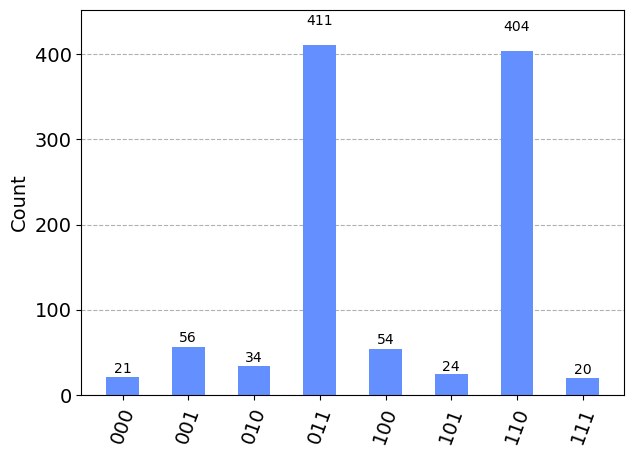

In [5]:
job_X0 = backend.retrieve_job(job_id_X0)
counts_X0 = job_X0.result().get_counts()
plot_histogram(counts_X0)

In [7]:
probs = [(count, counts_X0[count]/1024) for count in counts_X0]
probs

[('000', 0.0205078125),
 ('001', 0.0546875),
 ('010', 0.033203125),
 ('011', 0.4013671875),
 ('100', 0.052734375),
 ('101', 0.0234375),
 ('110', 0.39453125),
 ('111', 0.01953125)]

In [8]:
#run the remaining angles through the same computer
for j in range(1, len(ts)):
    qc_X0, job_id_X0, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'ibm', 
                                                    backend = backend)
    X0_job_ids.append(job_id_X0)

ibmqfactory.load_account:WARNING:2023-02-18 18:04:53,177: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-18 18:04:58,283: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-18 18:05:02,224: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-18 18:05:06,411: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-18 18:05:11,068: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-18 18:05:14,526: Credentials are already in use. The existing account in the session will be replaced.


IBMQBackendJobLimitError: "Error submitting job: '400 Client Error: Bad Request for url: https://api.quantum-computing.ibm.com/api/Network/ibm-q/Groups/open/Projects/main/Jobs. Reached maximum number (5) of concurrent jobs, Error code: 3458.'"

Okay, we can only run 5 at a time. Also, need to remove the load account from the run_experiments file, or supress the warning since we'd need to pass the provider to the function.

In [9]:
for j in range(6, 10):
    qc_X0, job_id_X0, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'ibm', 
                                                    backend = backend)
    X0_job_ids.append(job_id_X0)

ibmqfactory.load_account:WARNING:2023-02-18 18:15:07,858: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-18 18:15:12,313: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-18 18:15:15,777: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-18 18:15:19,622: Credentials are already in use. The existing account in the session will be replaced.


In [10]:
for j in range(10, 15):
    qc_X0, job_id_X0, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'ibm', 
                                                    backend = backend)
    X0_job_ids.append(job_id_X0)

ibmqfactory.load_account:WARNING:2023-02-18 18:36:03,245: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-18 18:36:08,113: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-18 18:36:11,832: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-18 18:36:15,754: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-18 18:36:20,463: Credentials are already in use. The existing account in the session will be replaced.


In [11]:
for j in range(15, 20):
    qc_X0, job_id_X0, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'ibm', 
                                                    backend = backend)
    X0_job_ids.append(job_id_X0)

ibmqfactory.load_account:WARNING:2023-02-18 18:55:21,244: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-18 18:55:25,319: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-18 18:55:29,067: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-18 18:55:34,059: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-18 18:55:37,942: Credentials are already in use. The existing account in the session will be replaced.


Let's get a fidelity graph! Again, we have Basis $X$ and Alice is sending 0

In [18]:
from pipeline.run_experiments import get_fidelities
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [52]:
def plot_fidelities(job_ids = [], basis = 'X', gateset = 'qiskit', backend = 'ibmq_manila', alice_bit = 0, shots = 1024, show = True):
    '''
    This function retrieves and displays the fidelities resulting from the experiment for Alice, Bob, and the Ancilla. 
    It returns ts, and the probabilities to plot against simulation and/or theory results.

    Parameters:
    --------------
    job_ids - List of IDs (str) of experiments (jobs) for which to retrieve information. 
    backend - String of backend used: IBMQ computer utilized or 'ionq' or 'qiskit-ionq'. 
                    Default is 'ibmq_manila', but should use return from `run_experiment_ibm` when running on IBM. 
                    Overwritten for backend = 'ionq' or 'qiskit-ionq'.
                    Encodes as string incase backend object passed.
    alice_bit - Value of the bit sent (0 or 1). Int, default is 0.
    shots - Number of samples. Int, default value is 1024. 
    show - Boolean: display plot. Default is True.

    Returns:
    --------------
    QPU_B - Fidelities for Bob's measured qubit.
    QPU_E - Fidelities for Eve's measured qubit.
    QPU_A - Fidelities for Ancilla.
    ts - The theta_2 values used (x-axis values for plotting).
    
    '''
    #get angles tested
    ts = np.linspace(-np.pi/2, np.pi/2, 20)
    QPU_B = []
    QPU_E = []
    QPU_A = []

    for idx in range(len(job_ids)):
        #get fidelities/probabilities for each angle in ts
        qpu_prob_bob, qpu_prob_eve, qpu_prob_ancilla = get_fidelities(job_id = job_ids[idx], 
                                                                        gateset = gateset,
                                                                        backend = str(backend),
                                                                        bitval = alice_bit,
                                                                        shots = shots)
        #add probabilities to appropriate list
        QPU_B.append(qpu_prob_bob)
        QPU_E.append(qpu_prob_eve)
        QPU_A.append(qpu_prob_ancilla)
        
    #convert lists to arrays for plotting
    QPU_B = np.array(QPU_B)
    QPU_E = np.array(QPU_E)
    QPU_A = np.array(QPU_A)

    if show:
        #plot fidelites if show is true
        plt.figure(figsize=(15,8))
        plt.rcParams.update({'font.size': 12})

        plt.plot(ts, QPU_B, label = "Bob's fidelity (IonQ QPU)", marker='o',color='blue')
        plt.plot(ts, QPU_E, label = "Eve's fidelity (IonQ QPU)", marker='o',color='red')
        plt.plot(ts, QPU_A, label = "Ancilla fidelity (IonQ QPU)", marker='o',color='green')

        plt.yticks(np.arange(0,1.1, step = .1))
        plt.xticks(np.arange(-np.pi/2, 5*np.pi/8, step = np.pi/8))
        plt.legend(title = "Message bit = " + str(alice_bit) + ", " + str(basis) + " basis")

        plt.xlabel('theta_2')
        plt.show()
    
    return QPU_B, QPU_E, QPU_A, ts

In [20]:
type(backend)

qiskit.providers.ibmq.ibmqbackend.IBMQBackend

ibmqfactory.load_account:WARNING:2023-02-20 15:03:56,755: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 15:04:01,544: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 15:04:05,209: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 15:04:08,830: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 15:04:13,042: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 15:04:16,588: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 15:04:19,887: Credentials are already in use. The existing account in the session will be re

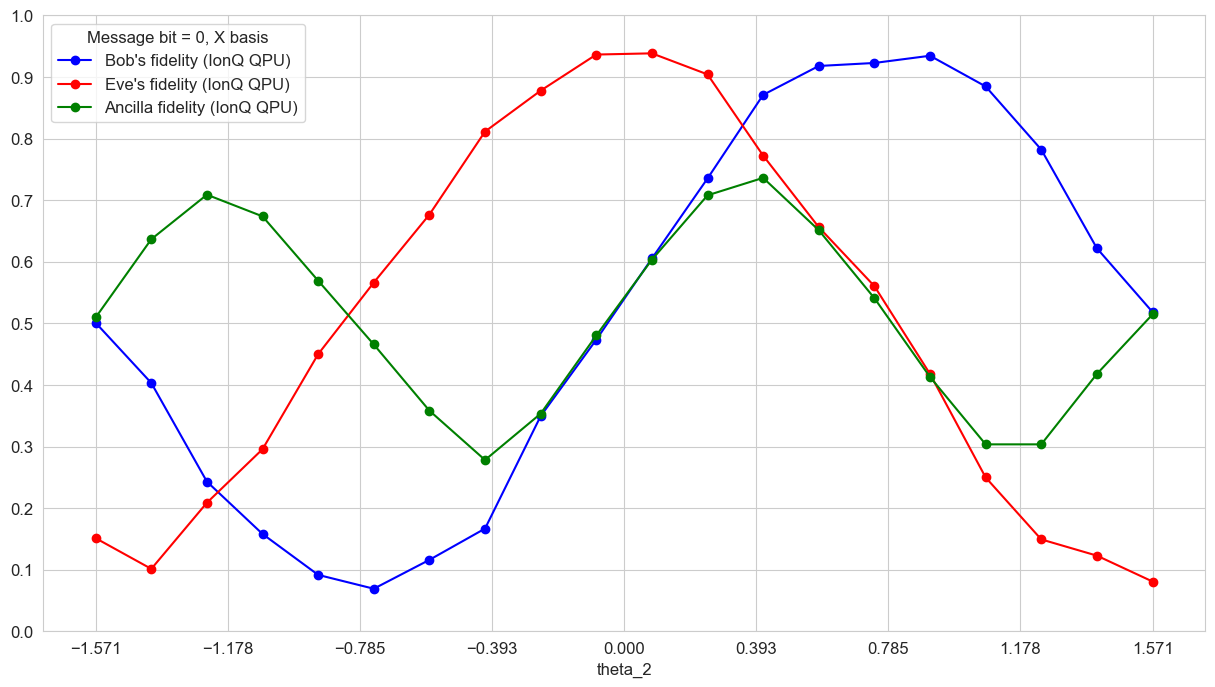

(array([0.50097656, 0.40332031, 0.24316406, 0.15820312, 0.09179688,
        0.06933594, 0.11621094, 0.16699219, 0.34960938, 0.47363281,
        0.60546875, 0.73535156, 0.87109375, 0.91796875, 0.92285156,
        0.93457031, 0.88476562, 0.78222656, 0.62207031, 0.51855469]),
 array([0.15136719, 0.1015625 , 0.20898438, 0.29589844, 0.45019531,
        0.56640625, 0.67675781, 0.81152344, 0.87792969, 0.93652344,
        0.93847656, 0.90429688, 0.77246094, 0.65625   , 0.56054688,
        0.41796875, 0.25      , 0.14941406, 0.12304688, 0.08105469]),
 array([0.50976562, 0.63671875, 0.70898438, 0.67382812, 0.56933594,
        0.46582031, 0.35839844, 0.27832031, 0.35351562, 0.48046875,
        0.60351562, 0.70800781, 0.73632812, 0.65136719, 0.54101562,
        0.41308594, 0.30371094, 0.30371094, 0.41796875, 0.51464844]),
 array([-1.57079633, -1.40544935, -1.24010236, -1.07475538, -0.9094084 ,
        -0.74406142, -0.57871444, -0.41336745, -0.24802047, -0.08267349,
         0.08267349,  0.24802047

In [53]:
plot_fidelities(job_ids = X0_job_ids, gateset = 'ibm', backend = 'ibmq_lima')

## Now let's take a look at Alice sending 1 with the X Basis

In [29]:
#store job_ids
X1_job_ids = []

We will use 'ibmq-lima', as with 0. Should still be saved in `backend`.

In [26]:
backend 

<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>

Remember, we can only run 5 jobs at a time.

In [32]:
for j in range(5):
    qc_X1, job_id_X1, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'ibm',
                                                    bitval = 1, 
                                                    backend = backend)
    #add test to our list
    X1_job_ids.append(job_id_X1)

ibmqfactory.load_account:WARNING:2023-02-19 20:06:22,910: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-19 20:06:28,692: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-19 20:06:32,467: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-19 20:06:36,387: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-19 20:06:40,991: Credentials are already in use. The existing account in the session will be replaced.


In [34]:
#next 5
for j in range(5, 10):
    qc_X1, job_id_X1, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'ibm',
                                                    bitval = 1, 
                                                    backend = backend)
    #add test to our list
    X1_job_ids.append(job_id_X1)

ibmqfactory.load_account:WARNING:2023-02-20 13:38:34,717: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 13:38:40,445: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 13:38:44,393: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 13:38:48,100: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 13:38:53,474: Credentials are already in use. The existing account in the session will be replaced.


In [35]:
#next 5
for j in range(10, 15):
    qc_X1, job_id_X1, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'ibm',
                                                    bitval = 1, 
                                                    backend = backend)
    #add test to our list
    X1_job_ids.append(job_id_X1)

ibmqfactory.load_account:WARNING:2023-02-20 13:52:28,927: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 13:52:32,659: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 13:52:36,512: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 13:52:41,356: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 13:52:45,027: Credentials are already in use. The existing account in the session will be replaced.


In [38]:
len(X1_job_ids)

15

In [39]:
str_backend = str(backend)
str_backend

'ibmq_lima'

In [42]:
#last 5
for j in range(15, 20):
    qc_X1, job_id_X1, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'ibm',
                                                    bitval = 1, 
                                                    backend = backend)
    #add test to our list
    X1_job_ids.append(job_id_X1)

ibmqfactory.load_account:WARNING:2023-02-20 14:24:35,390: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 14:24:40,393: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 14:24:44,364: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 14:24:48,235: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 14:24:53,108: Credentials are already in use. The existing account in the session will be replaced.


In [43]:
len(X1_job_ids)

25

In [44]:
X1_job_ids

['63f2c79287dd66defa79f40f',
 '63f2c79783564e1b0e91f6fa',
 '63f2c79b63ecbdbfaca49807',
 '63f2c7a06171977ccb896906',
 '63f2c7a417b7ed1ec0250050',
 '63f3be2f17b7ed1d52250439',
 '63f3be3383564e0d1e91fb1c',
 '63f3be372a88b64f0ae2614b',
 '63f3be3cfff8d3df6a7f818f',
 '63f3be4017b7edeaaa25043a',
 '63f3c17087dd66bf8c79f9a7',
 '63f3c173fff8d30c957f819c',
 '63f3c1782a88b6acf4e26152',
 '63f3c17c2a88b63545e26153',
 '63f3c18083564e251e91fb21',
 '63f3c22b63ecbd8f6aa49c28',
 '63f3c22f63ecbd6b5ea49c2a',
 '63f3c23217b7ed54bc250444',
 '63f3c23863ecbd6f1ca49c2b',
 '63f3c23c87dd66904179f9ad',
 '63f3c8f7fff8d342497f81b4',
 '63f3c8fb61719774b6896d34',
 '63f3c8ff87dd6660cc79f9be',
 '63f3c90487dd66697379f9bf',
 '63f3c90817b7ed70cf250450']

In [45]:
X1_job_ids_extras = X1_job_ids.copy()
X1_job_ids = X1_job_ids[:-5]
X1_job_ids

['63f2c79287dd66defa79f40f',
 '63f2c79783564e1b0e91f6fa',
 '63f2c79b63ecbdbfaca49807',
 '63f2c7a06171977ccb896906',
 '63f2c7a417b7ed1ec0250050',
 '63f3be2f17b7ed1d52250439',
 '63f3be3383564e0d1e91fb1c',
 '63f3be372a88b64f0ae2614b',
 '63f3be3cfff8d3df6a7f818f',
 '63f3be4017b7edeaaa25043a',
 '63f3c17087dd66bf8c79f9a7',
 '63f3c173fff8d30c957f819c',
 '63f3c1782a88b6acf4e26152',
 '63f3c17c2a88b63545e26153',
 '63f3c18083564e251e91fb21',
 '63f3c22b63ecbd8f6aa49c28',
 '63f3c22f63ecbd6b5ea49c2a',
 '63f3c23217b7ed54bc250444',
 '63f3c23863ecbd6f1ca49c2b',
 '63f3c23c87dd66904179f9ad']

63f3c23c87dd66904179f9ad',

In [46]:
X1_job_ids_extras

['63f2c79287dd66defa79f40f',
 '63f2c79783564e1b0e91f6fa',
 '63f2c79b63ecbdbfaca49807',
 '63f2c7a06171977ccb896906',
 '63f2c7a417b7ed1ec0250050',
 '63f3be2f17b7ed1d52250439',
 '63f3be3383564e0d1e91fb1c',
 '63f3be372a88b64f0ae2614b',
 '63f3be3cfff8d3df6a7f818f',
 '63f3be4017b7edeaaa25043a',
 '63f3c17087dd66bf8c79f9a7',
 '63f3c173fff8d30c957f819c',
 '63f3c1782a88b6acf4e26152',
 '63f3c17c2a88b63545e26153',
 '63f3c18083564e251e91fb21',
 '63f3c22b63ecbd8f6aa49c28',
 '63f3c22f63ecbd6b5ea49c2a',
 '63f3c23217b7ed54bc250444',
 '63f3c23863ecbd6f1ca49c2b',
 '63f3c23c87dd66904179f9ad',
 '63f3c8f7fff8d342497f81b4',
 '63f3c8fb61719774b6896d34',
 '63f3c8ff87dd6660cc79f9be',
 '63f3c90487dd66697379f9bf',
 '63f3c90817b7ed70cf250450']

### Plot the Fidelities for Sending 1 in the $X$ Basis

ibmqfactory.load_account:WARNING:2023-02-20 15:05:13,986: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 15:05:17,234: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 15:05:22,008: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 15:05:25,760: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 15:05:29,290: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 15:05:34,043: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 15:05:37,427: Credentials are already in use. The existing account in the session will be re

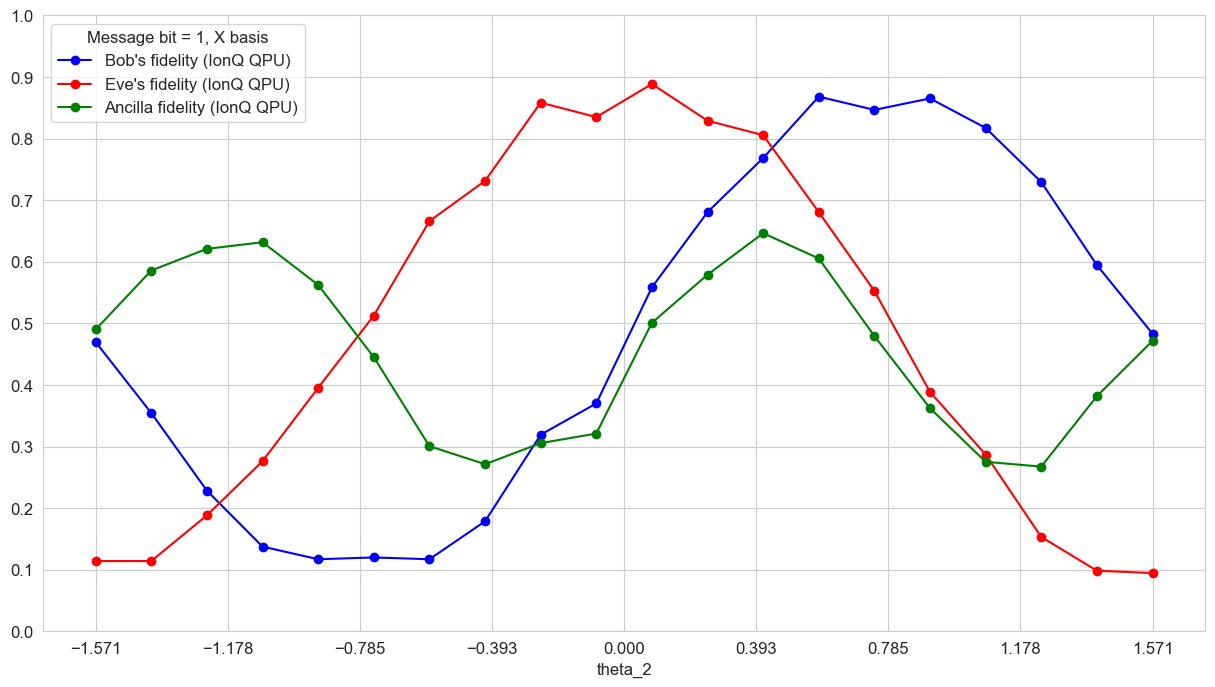

(array([0.46972656, 0.35449219, 0.22851562, 0.13769531, 0.1171875 ,
        0.12011719, 0.1171875 , 0.17871094, 0.31933594, 0.37011719,
        0.55859375, 0.68066406, 0.76855469, 0.86816406, 0.84667969,
        0.86523438, 0.81738281, 0.72949219, 0.59472656, 0.48339844]),
 array([0.11425781, 0.11425781, 0.18847656, 0.27636719, 0.39550781,
        0.51269531, 0.66601562, 0.73144531, 0.85839844, 0.83496094,
        0.88867188, 0.82910156, 0.80566406, 0.68066406, 0.55273438,
        0.38867188, 0.28710938, 0.15332031, 0.09863281, 0.09472656]),
 array([0.49023438, 0.5859375 , 0.62109375, 0.63183594, 0.5625    ,
        0.4453125 , 0.30078125, 0.27148438, 0.30566406, 0.32128906,
        0.50097656, 0.57910156, 0.64648438, 0.60546875, 0.47949219,
        0.36230469, 0.27539062, 0.26757812, 0.38183594, 0.47167969]),
 array([-1.57079633, -1.40544935, -1.24010236, -1.07475538, -0.9094084 ,
        -0.74406142, -0.57871444, -0.41336745, -0.24802047, -0.08267349,
         0.08267349,  0.24802047

In [54]:
plot_fidelities(job_ids = X1_job_ids, gateset = 'ibm', alice_bit = 1, backend = backend)

## Let's see how things look in the $Y$ Basis

First, we'll check $Y$ basis with Alice sending 0.

In [55]:
#create a holder for our job ids
Y0_job_ids = []

In [56]:
basis = 'Y'

In [57]:
#run first 5
for j in range(5):
    qc_Y0, job_id_Y0, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'ibm',
                                                    basis_send = basis,
                                                    basis_measure = basis, 
                                                    backend = backend)
    #add test to our list
    Y0_job_ids.append(job_id_Y0)

ibmqfactory.load_account:WARNING:2023-02-20 15:07:38,626: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 15:07:43,842: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 15:07:47,701: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 15:07:51,435: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 15:07:56,610: Credentials are already in use. The existing account in the session will be replaced.


In [58]:
#run next 5
for j in range(5, 10):
    qc_Y0, job_id_Y0, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'ibm',
                                                    basis_send = basis,
                                                    basis_measure = basis, 
                                                    backend = backend)
    #add test to our list
    Y0_job_ids.append(job_id_Y0)

ibmqfactory.load_account:WARNING:2023-02-20 15:55:43,512: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 15:55:48,240: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 15:55:53,477: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 15:55:57,191: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 15:56:01,284: Credentials are already in use. The existing account in the session will be replaced.


In [59]:
#run next 5
for j in range(10, 15):
    qc_Y0, job_id_Y0, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'ibm',
                                                    basis_send = basis,
                                                    basis_measure = basis, 
                                                    backend = backend)
    #add test to our list
    Y0_job_ids.append(job_id_Y0)

ibmqfactory.load_account:WARNING:2023-02-20 16:41:58,739: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 16:42:03,112: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 16:42:08,240: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 16:42:11,911: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 16:42:15,743: Credentials are already in use. The existing account in the session will be replaced.


In [60]:
#run last 5
for j in range(15, 20):
    qc_Y0, job_id_Y0, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'ibm',
                                                    basis_send = basis,
                                                    basis_measure = basis, 
                                                    backend = backend)
    #add test to our list
    Y0_job_ids.append(job_id_Y0)

ibmqfactory.load_account:WARNING:2023-02-20 18:05:04,129: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:05:09,222: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:05:14,526: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:05:18,495: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:05:22,870: Credentials are already in use. The existing account in the session will be replaced.


### Plot the Fidelities for the $Y$ basis sending 0.

ibmqfactory.load_account:WARNING:2023-02-20 18:07:05,078: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:07:09,542: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:07:12,866: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:07:16,386: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:07:20,653: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:07:24,258: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:07:28,099: Credentials are already in use. The existing account in the session will be re

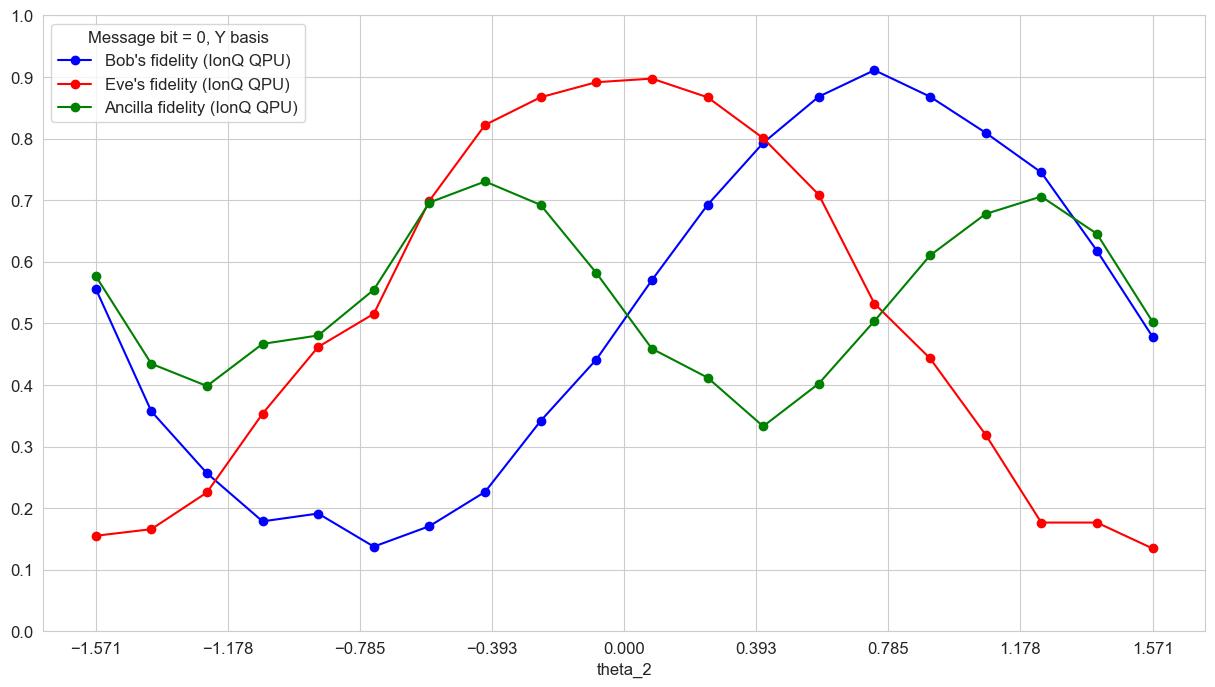

(array([0.55664062, 0.35742188, 0.25683594, 0.17871094, 0.19140625,
        0.13769531, 0.17089844, 0.2265625 , 0.34179688, 0.44140625,
        0.5703125 , 0.69238281, 0.79296875, 0.86816406, 0.91113281,
        0.86816406, 0.80957031, 0.74511719, 0.61816406, 0.47851562]),
 array([0.15527344, 0.16601562, 0.22558594, 0.35351562, 0.46191406,
        0.515625  , 0.69921875, 0.82226562, 0.8671875 , 0.89160156,
        0.89746094, 0.8671875 , 0.80078125, 0.70898438, 0.53222656,
        0.44335938, 0.31933594, 0.17675781, 0.17675781, 0.13476562]),
 array([0.57714844, 0.43457031, 0.3984375 , 0.46679688, 0.48046875,
        0.5546875 , 0.69628906, 0.73046875, 0.69238281, 0.58203125,
        0.45898438, 0.41210938, 0.33300781, 0.40234375, 0.50390625,
        0.61035156, 0.67773438, 0.70605469, 0.64550781, 0.50292969]),
 array([-1.57079633, -1.40544935, -1.24010236, -1.07475538, -0.9094084 ,
        -0.74406142, -0.57871444, -0.41336745, -0.24802047, -0.08267349,
         0.08267349,  0.24802047

In [61]:
plot_fidelities(job_ids = Y0_job_ids, basis = basis, gateset = 'ibm', backend = backend)

### Now we check sending 1 in the $Y$ basis

In [62]:
#create a holder for our job ids
Y1_job_ids = []

In [63]:
#run first 5
for j in range(5):
    qc_Y1, job_id_Y1, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'ibm',
                                                    basis_send = basis,
                                                    basis_measure = basis, 
                                                    bitval = 1,
                                                    backend = backend)
    #add test to our list
    Y1_job_ids.append(job_id_Y1)

ibmqfactory.load_account:WARNING:2023-02-20 18:10:29,441: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:10:34,197: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:10:38,043: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:10:41,856: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:10:46,995: Credentials are already in use. The existing account in the session will be replaced.


In [64]:
#run next 5
for j in range(5, 10):
    qc_Y1, job_id_Y1, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'ibm',
                                                    basis_send = basis,
                                                    basis_measure = basis, 
                                                    bitval = 1,
                                                    backend = backend)
    #add test to our list
    Y1_job_ids.append(job_id_Y1)

ibmqfactory.load_account:WARNING:2023-02-20 18:17:49,047: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:17:53,440: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:17:56,985: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:18:01,534: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:18:05,985: Credentials are already in use. The existing account in the session will be replaced.


In [65]:
#run next 5
for j in range(10, 15):
    qc_Y1, job_id_Y1, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'ibm',
                                                    basis_send = basis,
                                                    basis_measure = basis, 
                                                    bitval = 1,
                                                    backend = backend)
    #add test to our list
    Y1_job_ids.append(job_id_Y1)

ibmqfactory.load_account:WARNING:2023-02-20 18:19:50,872: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:19:54,678: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:19:58,431: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:20:03,614: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:20:07,420: Credentials are already in use. The existing account in the session will be replaced.


In [66]:
#run last 5
for j in range(15, 20):
    qc_Y1, job_id_Y1, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'ibm',
                                                    basis_send = basis,
                                                    basis_measure = basis, 
                                                    bitval = 1,
                                                    backend = backend)
    #add test to our list
    Y1_job_ids.append(job_id_Y1)

ibmqfactory.load_account:WARNING:2023-02-20 18:22:25,621: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:22:29,249: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:22:33,797: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:22:37,272: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:22:41,261: Credentials are already in use. The existing account in the session will be replaced.


### Plot the results of sending 1 in the $Y$ basis

ibmqfactory.load_account:WARNING:2023-02-20 18:25:05,081: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:25:08,692: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:25:12,078: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:25:16,431: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:25:20,243: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:25:23,799: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-20 18:25:27,958: Credentials are already in use. The existing account in the session will be re

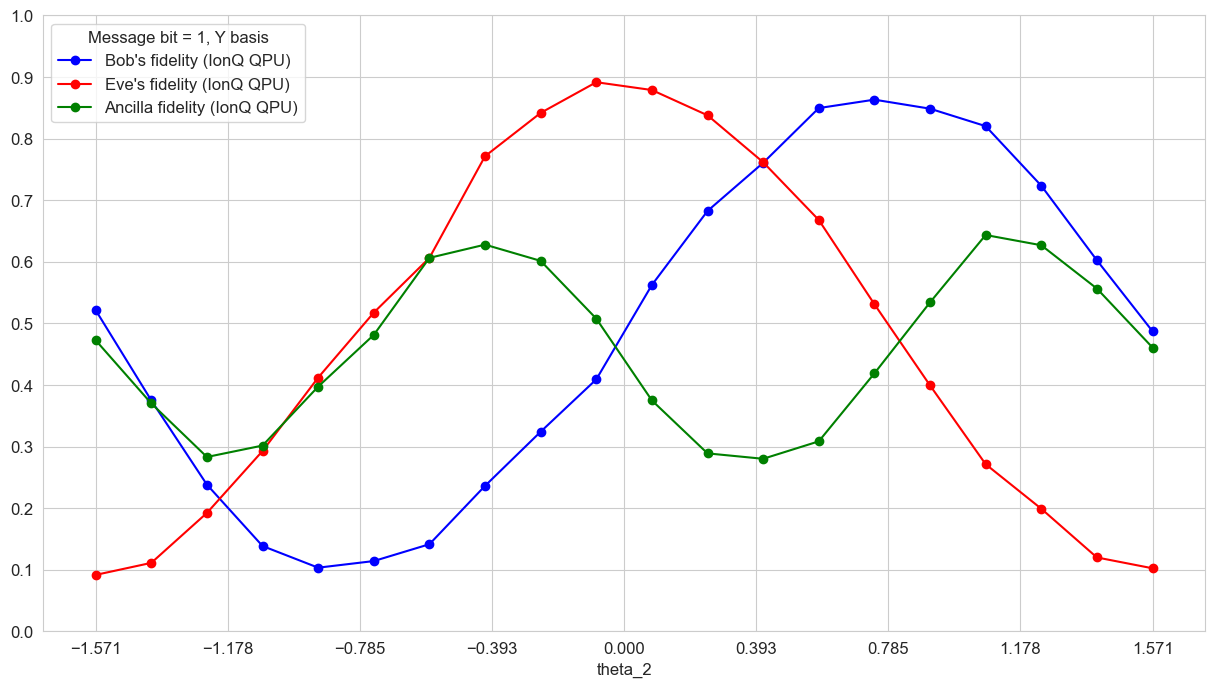

(array([0.52148438, 0.375     , 0.23828125, 0.13867188, 0.10351562,
        0.11425781, 0.14160156, 0.23632812, 0.32421875, 0.40917969,
        0.5625    , 0.68261719, 0.76074219, 0.84960938, 0.86328125,
        0.84863281, 0.8203125 , 0.72363281, 0.60253906, 0.48730469]),
 array([0.09179688, 0.11132812, 0.19238281, 0.29296875, 0.41210938,
        0.51757812, 0.60644531, 0.77148438, 0.84179688, 0.89160156,
        0.87890625, 0.83789062, 0.76171875, 0.66796875, 0.53125   ,
        0.39941406, 0.27148438, 0.19921875, 0.12011719, 0.10253906]),
 array([0.47265625, 0.37011719, 0.28320312, 0.30175781, 0.39746094,
        0.48144531, 0.60644531, 0.62792969, 0.6015625 , 0.5078125 ,
        0.375     , 0.2890625 , 0.28027344, 0.30859375, 0.41894531,
        0.53417969, 0.64355469, 0.62695312, 0.55664062, 0.4609375 ]),
 array([-1.57079633, -1.40544935, -1.24010236, -1.07475538, -0.9094084 ,
        -0.74406142, -0.57871444, -0.41336745, -0.24802047, -0.08267349,
         0.08267349,  0.24802047

In [68]:
plot_fidelities(job_ids = Y1_job_ids, basis = basis, gateset = 'ibm', alice_bit = 1, backend = backend)